# Artificial Intelligence Topic 2 Machine Learning

## Week 5: Introduction, Ethics and types



## This Week:
###  Background
- What is ML: recap
- Types of ML
- Ethical Considerations: Creating and Using Data

###  Types of Machine Learning
- Unsupervised Learning: K-Means as an example
- Reinforcement Learning


### Next few weeks: 
- Supervised Machine Learning, 
- Artificial Neural Networks 

## Recap:<img style="float:right" width=300 src="./figures/basic-model-fitting.png">
- Machine Learning is:
 - the application of inductive logic to a dataset
 -  to create useful predictive models.  
 - So it is about solving  modelling problems
 

- In week 1 we learned that problem solving is what you do when one of  
  Input > Model –> Output     is missing
- In the last topic we looked at how we **manually** create models encoding human expertise  ///////////// not done yet
- Machine Learning is about how you **automatically** create models  from data (inputs and outputs)


## So it’s all about the data?

### Yes!

The aim is to build ML systems that can be used to do things when data or scenarios arise.  
So we need data to: 
- train them on,  
- choose between models, 
- Know (estimate) how well they are going to do when we start using them

We may not always have an output for every input 
- Because they’re not possible to capture
  - e.g. data from scientific experiments such as genomics, astrophysics,...
- Because sometimes we have to wait a while e.g.,
  - game playing
  - finding human volunteers to label images/ caption videos,...

## Types of Machine Learning
Type | Inputs | Outputs | Feedback | What drives search? | Examples
-----|--------|---------|----------------|---------------------|---------------------
**Supervised** | Data |Predictions for each case | Correct labels | Accuracy of predictions made | **Recognition**  speech, images, actions, **Forecasting**
**Reinforcement**| Scenarios | Actions to take in different states | Periodic Rewards | Expected future feedback | Learning game strategy
**Unsupervised** | Data| Groupings of similar items | None | Statistics about cluster *coherence* and separation | Recommender systems, search engines



## Ethics: *Can* we use the data?
- GDPR,  Privacy policies affect how it is collected
- The law is very clear that we have to give people the right to:
  - Provide Informed Consent about  how we are going to use their personal data at the time we collect it
  - Find out what information we hold about them
  - Withdraw their data (e.g. “right to forget”)

- Examples of unethical use:    
 - Cambridge Analytica,   
 - targeting of fake news, propaganda on social media

- Nowadays there should be clear collaboration agreements describing who is the data controller and who is the data processor


## Ethics: *Should* we use the data? <img src="figures/algorithms-of-oppression.png" style="float:right" width = 100> 
<img style="float:right" src="figures/protected-characteristics.png" width = 600>

- ML is only as good as the data we give it
- So we have to be very careful that the data is representative

- Examples of problems:
  - Microsoft's (abandoned) Tay Bot
  - <a href="https://aibusiness.com/document.asp?doc_id=767688">Google to remove gender labels from image recognition tool 25/2/21</a>
  - <a href="https://www.technologyreview.com/2020/07/17/1005396/predictive-policing-algorithms-racist-dismantled-machine-learning-bias-criminal-justice/">Predictive policing algorithms are racist. They need to be dismantled.</a>
  -  <a href="https://www.reuters.com/article/us-amazon-com-jobs-automation-insight-idUSKCN1MK08G">Amazon scraps secret AI recruiting tool that showed bias against women</a>

## Example of bias in Image-Net
Image net is the standard dataset used by many AI teams and researchers.  
'Synsets' are sets of words with common meaning e.g. "manager", "teacher", "cleaner", "nurse", ...
![Image net is the dataset used by many AI teams and researchers](https://www.image-net.org/static_files/figures/demographcs_distribution.png)

Image from https://www.image-net.org/static_files/figures/demographcs_distribution.png

Quick Video from Cog-x

[![AI Ethics with Dong Nguyen, The Alan Turing Institute | CogX17 Highlight | CogX](https://img.youtube.com/vi/v=M-ko82Y0GUQ/0.jpg)](https://www.youtube.com/watch?v=M-ko82Y0GUQ)

# Break

## Unsupervised Learning : finding groups in data
- We don’t have labels ... but we still want to find useful groups<img src="figures/clustering.png" style="float:right" width=400>
- All data is defined in terms of values for features
  - Numbers,  categories (_colour_, _name_, _Uni course_),  or even just _present-absent_
- So we define distance measure _d(a,b)_ between two data items _a_ and _b_.
  - Hamming Distance (number of features where _a_ and _b_ differ)
  - Euclidean (straight line) distance for continuous numbers
- Typically in clustering we look for a way of putting the data items into _k_ clusters  
  Search is for models to maximise *Quality of Clustering*
  - Minimise Intercluster Distance:  
   max ( _d(a,b)_ ) for all _a,b_, in **same** cluster
  - Maximise Intracluster distance:
    min(_d(a,c)_) for _a_ and _c_ in **different** clusters


## K Means: probably the best known clustering algorithm

Basic Idea:  

- clusters defined by a set of *centroids* (mid-points)
  - centroids probably not "real" data items
- data items assigned to the cluster with the closest centroid

Algorithm
- start with randomly picked items as  centroids
- Loop until no changes:
  - assign items to clusters
  -  move each centroids to the new mid-point of all the items in the cluster
  


## K-Means : Pseudocode
```
#Step 0: init
Pick K data points at random to be cluster “centroids” C_k k=1,...,K
Set Converged = False
  
# Main loop
WHILE Converged= False:  
  ```

```   
    #Step 1: Assign items to clusters  
    For each data point i:  
      For each cluster k:
        Calculate distance d(i,C_k) 
      Assign i to  cluster with smallest value of d(i,C_k) 
 ```

```
    #Step 2: Check to see if the algorithm has converged
    If no datapoints have moved cluster:
       Converged = True
    Else:
       Remember new cluster membership
```

``` 
    #Step 3 Update cluster centroids
    Foreach cluster k in (1...K):
      Set new cluster centroid C_k =  mean position of  points in cluster
      Update Cluster metrics
      
IF (converged==True):
  return cluster centroids
```

In [1]:
# start by importing some modules we will use
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import math
import copy

In [2]:
# import the apples-oranges-bananas data set from the first week

# columns in X are Red,Green,Blue,Width,Height,Weight,Type

# read in all the data from the apples-oranges-bananas dataset
alldata = np.genfromtxt('data/fruit_values.csv', delimiter=',')

#select the first two  feature values to make visualisation easier
X = alldata[:,:2]

numItems = X.shape[0]

numFeatures  = X.shape[1]
print(f" The shape of X is {X.shape} so there are {numItems} items, each with {numFeatures} features")


 The shape of X is (30, 2) so there are 30 items, each with 2 features


In [3]:
def AssignItemsToClusters(X, centres):
    '''returns an array with index of the closest cluster for each item'''

    # X is 2d array of data items, centres is 2d array of cluster centres
    
    # X.shape[0] and centres.shape[0] tell us the number of items and clusters
    # X.shape[1] and centres.shape[1] tell us how many columns (features) they have
    
    assert X.shape[1] == centres.shape[1] #make sure they have same number of features
    
    #make 1D numpy array to hold an (integer) cluster label for each item
    clusterLabels = np.zeros(X.shape[0],dtype=int)    
    
    # loop over all rows in the data array
    for thisItem in range(X.shape[0]):
        
        # start by guessing  first cluster is closest
        clusterLabels[thisItem] = 0
        closestClusterDist = getDistance( X[thisItem], centres[0])
        
        #then loop over the other clusters looking for one closer
        for thisCluster in range( centres.shape[0]):
            clusterDist = getDistance( X[thisItem], centres[thisCluster])
            if(clusterDist < closestClusterDist):
                clusterLabels[thisItem] = thisCluster
                closestClusterDist = clusterDist
        
    return clusterLabels

In [4]:
def getDistance(a,b):
    ''' gets the Euclidean (straight line) distance between two items a and b'''
    ''' this is just Pythagoras' theorem in N-dimensions'''
    #a and b must have same number of dimensions/feastures
    assert a.shape[0] == b.shape[0]
    distance=0.0
    for feature in range( a.shape[0]):
        difference = a[feature] - b[feature]
        distance= distance + difference*difference
    return math.sqrt(distance)          
    
    

In [5]:
def PlotCluster(X,labels,centres, oldcentres,iteration):
    fig, ax= plt.subplots(figsize=(7.5, 7.5))
    
    # show a scatter plot  coloured by labels
    ax.scatter(X[:, 0], X[:, 1], c=labels)
    #put the new centres on
    for k in range(centres.shape[0]):
        ax.plot(oldcentres[k][0],oldcentres[k][1], marker = '*',color='r',markersize=12)
        
    #draw lines to show movements
    for k in range (centres.shape[0]):
        ax.annotate("", xy=centres[k], xycoords='data',xytext= oldcentres[k],textcoords='data',arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='red'),)
    ax.set_xlim((40,120))
    ax.set_ylim((40,120))

    plotTitle= "Cluster membership and centroids: iteration " + str(iteration) 
    ax.set_title(plotTitle)
    plt.show()

In [6]:
def runKMEANS(X):
    
    #Step 0  pick K random data items as the initial cluster centres
    #idx = np.random.randint(numItems, size=K)
    idx = np.linspace(start= 5,stop=X.shape[0],num=K,endpoint=False,dtype=int)
    centres = copy.deepcopy(X[idx,:] ) #important that we make a separate copy rather than a reference
    clusterLabels = AssignItemsToClusters(X,centres)

    
    for iteration in range(10):                    #MAIN LOOP
        oldcentres= copy.deepcopy(centres) #remember for plotting
        
        # Step 1: assign items to  clusters
        newLabels = AssignItemsToClusters(X,centres) 
 
        #step 2: see if algorithm has converged
        numMoved = np.sum(newLabels != clusterLabels)
        if( (iteration>0) and (numMoved==0)):
            print("converged after {} iterations".format(iteration))
            break
    
        #step 3: find new cluster centroids
        for k in range(K): # loop through each cluster
            num_in_cluster = 0
            for feature in range(X.shape[1]):
                centres[k][feature]= 0.0
            for item in range(numItems):
                if (newLabels[item]==k) :
                    num_in_cluster +=1
                    centres[k] += X[item]
            if(num_in_cluster >0):
                centres[k] /= num_in_cluster
        #plot     
        PlotCluster(X,clusterLabels,centres,oldcentres, iteration+1) 
        # move cluster centroids
        clusterLabels=newLabels


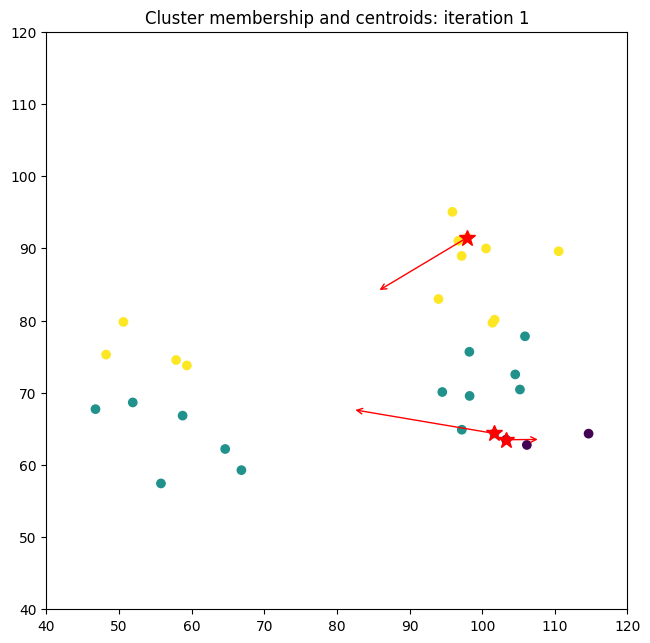

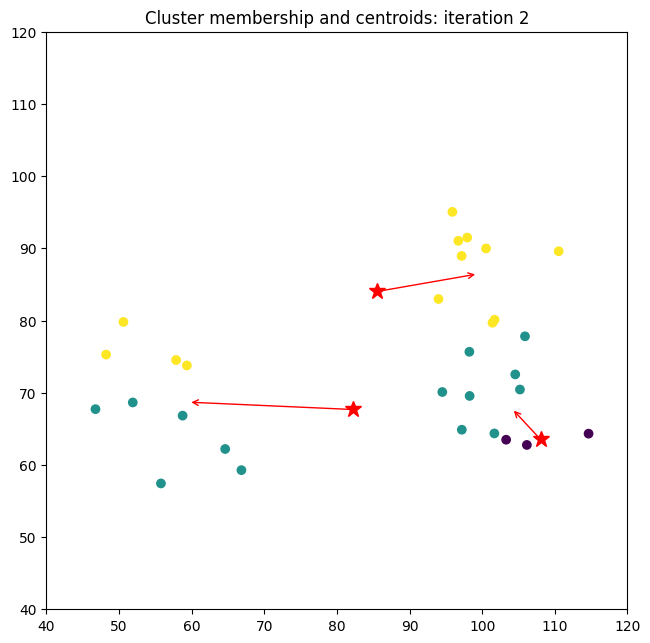

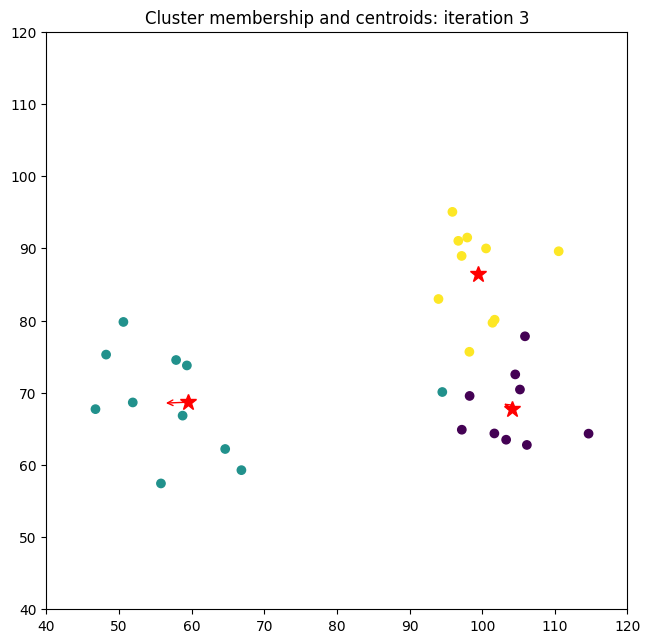

converged after 3 iterations


In [8]:
K = 3
runKMEANS(X)

## Of course you wouldn't normally write your own version...

Highly optimised versions available in well-established frameworks e.g. Weka (Java), scikit-learn (python).

`class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001,...)`  
 - defult number of clusters
 - variety of "smart" initialisation schemes
 - n_init: number of repeats it does before returning the best
 
Object attributes include: 
- `cluster_centers` :ndarray of shape (n_clusters, n_features)
- `labels`  : ndarray of shape (n_samples,)
- `inertia` : float (Sum of squared distances of samples to their closest cluster center.)

 
Methods include: 
- `fit(X[, y, sample_weight])` : Compute k-means clustering.
or this estimator.
- `predict(X[, sample_weight])` : Predict the closest cluster each sample in X belongs to.
- `fit_predict(X[, y, sample_weight])` : Compute cluster centers and predict cluster index for each sample.
- `get_params([deep])` : Get parameters f
- `score(X[, y, sample_weight])` : Opposite of the value of X on the K-means objective.
- ...


## K-Means Strengths and weaknesses 
<img src="figures/kmeans_clustering_examples.png" style="float:right">

### PROS: 
- fast, 
- lots of implementations

### CONS:
- need right value of K, 
- results depend on starting points

### Assumptions:
- all features are relevant, 
- data is "globular" with respect to the current features

### How could we fix the counter-example?

## Break

## Reinforcement Learning
Five minute video.

[![Reinforcement learning for bar-tenders](https://img.youtube.com/vi/v=m2weFARriE8/0.jpg)](https://www.youtube.com/watch?v=m2weFARriE8)
https://www.youtube.com/watch?feature=oembed&v=m2weFARriE8

## Reinforcement Learning   black text can be hard to see <img src="figures/RL.png" style="float:right" width=400>
Q learning was best known initial algorithm

Basic idea is that you have a *Reward* table R
- which tells you what reward you get if you are in state s and take action a
- for a multi-step problem the immediate rewards might be zero for many states  
  e.g. finding your way out of a maze, playing tic-tac-toe (noughts and crosses)   

Uses repeated trials to learn a Quality table Q: *s* rows and *a* actions  

Start exploring, and build up a history of states (*s<sub>1</sub>*, *s<sub>2</sub>*, ..., *s<sub>t</sub>*) and actions (*a<sub>1</sub>*, *a<sub>2</sub>*, ..., *a<sub>t</sub>*)

If at time  *t* you get a reward *r* then:  
Q[s<sub>t</sub>][a<sub>t</sub>]  is increased by _r_    
and the previous steps get a 'discounted' reward too: Q[s<sub>t-n</sub>][a<sub>t-n</sub>] is increased by  0.9<sup>*n*</sup> * _r_  


Over time the Q table learns the best sequences of moves to take => use it to pick the next move
    
Problems with scalability as numbers of  states and actions increase

## Deep Reinforcement Learning  <img src="figures/AlphaGoZero.png" style="float:right" width=300>
- neural network rather than table ///// first time youve mentioned neural networks maby give a picture or example
- tends to learn “end-to-end”  rather than a Q table and a policy table
  E.g. Alpha Go, Atari simulator
- Relies on lots of data:  
  e.g. Unity: ‘learning brain’ from ml-agents toolkit links out to tensorflow model
 
- Alpha Go Zero:   
  learned by playing itself!
  image from https://medium.com/syncedreview/alphago-zero-approaching-perfection-d8170e2b4e48
 
 Really nice explanation of Q-learning here: http://mnemstudio.org/path-finding-q-learning-tutorial.htm
 

## Supervised Learning
Basic idea: Models divide up “decision space” into regions


Search for model is driven by minimising error

Form depends on what the ouputs can be
- Two class:  0/1 loss (i.e. %age of wrong predictions)
- Many class: Cross entropy 
- Continuous: mean squared error

Types of models we’ll look at:
- ////K Nearest Neighbours////
- ////Greedy Rule Induction////
- Decision Trees
- ////Artificial Neural Nets//// not been covered 

**Classification** algorithms put labels on regions

**Regression** algorithms compute a function in regions. 



<h2> luca comment: could have a more clear exp;anation written down </h2>

## The basic supervised learning process
1. Choose features according to what kind of data you have available
2. Decide what types of model might be appropriate 
 - human readable?,   
 - type and amount of data?    
3. Initialise Model 
4.  While not finished:
  - See how well it does on training set
 - Adapt model to reduce error on training set
5.  Try to estimate how good it is

Often do steps 3-5 above in parallel with different types of model or metaparameters
E.g. max number of rules, max depth of trees, value of k in kNN, learning rates in ANN   


## How we use our data <img src="figures/using_data.png" style="float:right" width=300>

### Unsupervised Learning: 
- Estimate of quality is based on whole dataset,  
  so use it all for training

### Reinforcement learning:
- Problem is usually lack of data  
  compared to size of state-action space.  
- Because data is only generated by using the algorithm!
- Alternate periods of:
  - training (explore state-action-reward space to improve model)
  - testing (choose current max predicted reward in each state) 
  
### Supervised learning:
Most commonly work in *off-line* or  *batch* mode 
- Random split of the data into separate test set, 
  training set, and sometimes validation set
- Final model then built using all the data available


# Summary: you need to know and understand
- When it is legal and ethical to use data
- The basic workflow of **preprocess** &rarr; **train** &rarr; **test**
- The difference between **Unsupervised**, **Reinforcement**, and **Supervised Learning**
- kMeans as a typical unsupervised clustering algorithm
  - stochastic, distance-based
- The basic idea (but not the details) of reinforcement learning 
  - immediate rewards for taking action *a* in state *s*
  - build up a Q-table predicting future reward for taking action *a* in state *s*
- Supervised learning:
  - places *decision boundaries* to divide  feature space into regions
  - *Classification*: each region has a label; *Regression*: each region calculates a number
  - adapts boundaries to minimise error on the *training set*
  